In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.decomposition import PCA, FastICA, TruncatedSVD
from sklearn.feature_selection import VarianceThreshold
from sklearn.random_projection import GaussianRandomProjection,SparseRandomProjection
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

from scipy.stats import kurtosis
from sklearn.datasets import load_digits
from scipy import linalg

from kneed import KneeLocator
from sklearn.metrics import silhouette_score, v_measure_score,homogeneity_score,adjusted_rand_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

# Data Loading

In [36]:
data = load_digits().data
labels = load_digits().target

# k-means clustering

In [37]:
#How did we choose k?
#We chose k=10 by running SSE and Silhouette Score to calculate 
#mean intra-cluster distance (a) and the mean 
#nearest-cluster distance (b) for each sample
#chose lowest SSE and highest silhouette score

In [16]:
def kMeansDataGenerator(data, typeOfAlgorithm):
    kmeans_kwargs_random = {
       "init": "random",
       "n_init": 10,
       "max_iter": 300,
       "random_state": 42
    }

    kmeans_kwargs_pp = {
       "init": "k-means++",
       "n_init": 10,
       "max_iter": 300,
       "random_state": 42
    }
    
    randomVM = []
    kMeansPPVM = []

    randomHS = []
    kmeansPPHS=[]

    randomCS = []
    kmeansPPCS = []
    
    sseRandom = []
    ssePP = []

    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, **kmeans_kwargs_random)
        pred = kmeans.fit(data)
        kmeans.fit(data)
        randomVM.append(v_measure_score(labels, pred.predict(data)))
        randomHS.append(homogeneity_score(labels, pred.predict(data)))
        randomCS.append(adjusted_rand_score(labels, pred.predict(data)))
        sseRandom.append(kmeans.inertia_)
        
        kmeans = KMeans(n_clusters=k, **kmeans_kwargs_pp)
        pred = kmeans.fit(data)
        kmeans.fit(data)
        kMeansPPVM.append(v_measure_score(labels, pred.predict(data)))
        kmeansPPHS.append(homogeneity_score(labels, pred.predict(data)))
        kmeansPPCS.append(adjusted_rand_score(labels, pred.predict(data)))
        ssePP.append(kmeans.inertia_)
        
    plt.style.use("fivethirtyeight")
    plt.plot(range(1, 11), randomVM,label='Random')
    plt.plot(range(1, 11), kMeansPPVM,label='KMeans++')
    plt.xticks(range(1, 11))
    plt.yticks(np.arange(0,1.1,.1))
    plt.xlabel("Number of Clusters")
    plt.ylabel("V-measure cluster score")
    plt.legend()
    plt.title(f'''{typeOfAlgorithm} V-measure cluster score''')
    plt.show()
    print(f'''Max V-Measure is {max(max(randomVM),max(kMeansPPVM))}''')
    
    
    plt.style.use("fivethirtyeight")
    plt.plot(range(1, 11), randomHS,label='Random')
    plt.plot(range(1, 11), kmeansPPHS,label='KMeans++')
    plt.xticks(range(1, 11))
    plt.yticks(np.arange(0,1.1,.1))
    plt.xlabel("Number of Clusters")
    plt.ylabel("Homogeneity Score")
    plt.legend()
    plt.title(f'''{typeOfAlgorithm} Homogeneity Score''')
    plt.show()
    print(f'''Max Homogeneity Score is {max(max(randomHS),max(kmeansPPHS))}''')
    
    plt.style.use("fivethirtyeight")
    plt.plot(range(1, 11), randomCS,label='Random')
    plt.plot(range(1, 11), kmeansPPCS,label='KMeans++')
    plt.xticks(range(1, 11))
    plt.yticks(np.arange(0,1.1,.1))
    plt.xlabel("Number of Clusters")
    plt.ylabel("Adjusted Random Score")
    plt.legend()
    plt.title(f'''{typeOfAlgorithm} Adjusted Random Score''')
    plt.show()
    print(f'''Max Adjusted Random Score is {max(max(randomCS),max(kmeansPPCS))}''')
    
    plt.style.use("fivethirtyeight")
    plt.plot(range(1, 11), sseRandom, label = 'Random')
    plt.plot(range(1, 11), ssePP, label = 'KMeans++')
    plt.xticks(range(1, 11))
    plt.xlabel("Number of Clusters")
    plt.ylabel("Sum Squared Errors")
    plt.title(f'''{typeOfAlgorithm} SSE''')
    plt.legend()
    plt.show()
    
    return None

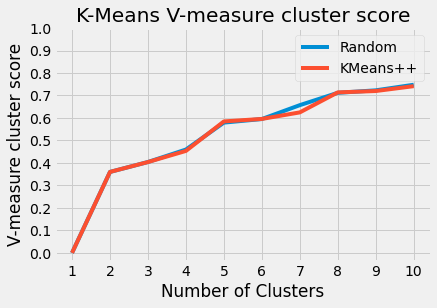

Max V-Measure is 0.7477007620274627


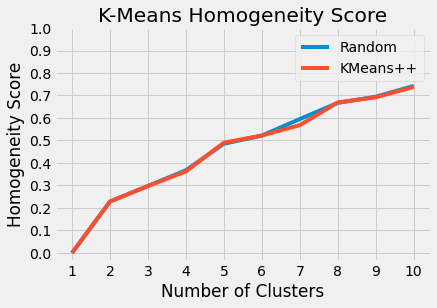

Max Homogeneity Score is 0.7425589509988264


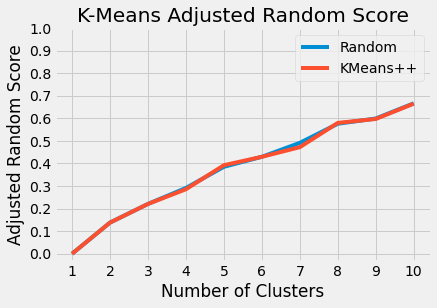

Max Adjusted Random Score is 0.6663518062801815


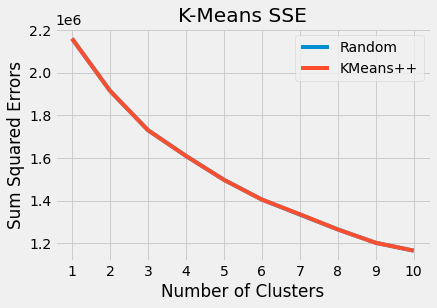

In [17]:
kMeansDataGenerator(data,'K-Means')

# Expectation Maximization

In [ ]:
#Describe clusters

In [33]:
def gaussianMixtureDataGenerator(data, typeOfAlgorithm):
    GM_Spherical = {
       'covariance_type' : 'spherical',
       "max_iter": 20,
       "random_state": 42
    }
    
    GM_Diag = {
       'covariance_type' : 'diag',
       "max_iter": 20,
       "random_state": 42
    }
    
    GM_Tied = {
       'covariance_type' : 'tied',
       "max_iter": 20,
       "random_state": 42
    }

    GM_Full = {
       'covariance_type' : 'full',
       "max_iter": 20,
       "random_state": 42
    }
    
    sphereVM = []
    diagVM = []
    tiedVM = []
    fullVM = []
    
    
    sphereHS = []
    diagHS = []
    tiedHS = []
    fullHS = []

    sphereAIC = []
    diagAIC = []
    tiedAIC = []
    fullAIC = []
    
    sphereBIC = []
    diagBIC = []
    tiedBIC = []
    fullBIC = []

    for n in range(1, 11):
        gmm = GaussianMixture(n_components=n,**GM_Spherical)
        pred = gmm.fit(data)
        sphereVM.append(v_measure_score(labels, pred.predict(data)))
        sphereHS.append(homogeneity_score(labels, pred.predict(data)))
        sphereAIC.append(gmm.aic(data))
        sphereBIC.append(gmm.bic(data))
        
        gmm = GaussianMixture(n_components=n,**GM_Diag)
        pred = gmm.fit(data)
        diagVM.append(v_measure_score(labels, pred.predict(data)))
        diagHS.append(homogeneity_score(labels, pred.predict(data)))
        diagAIC.append(gmm.aic(data))
        diagBIC.append(gmm.bic(data))
        
        gmm = GaussianMixture(n_components=n,**GM_Tied)
        pred = gmm.fit(data)
        tiedVM.append(v_measure_score(labels, pred.predict(data)))
        tiedHS.append(homogeneity_score(labels, pred.predict(data)))
        tiedAIC.append(gmm.aic(data))
        tiedBIC.append(gmm.bic(data))
        
        gmm = GaussianMixture(n_components=n,**GM_Full)
        pred = gmm.fit(data)
        fullVM.append(v_measure_score(labels, pred.predict(data)))
        fullHS.append(homogeneity_score(labels, pred.predict(data)))
        fullAIC.append(gmm.aic(data))
        fullBIC.append(gmm.bic(data))
    #Plot AIC    
    plt.style.use("fivethirtyeight")
    plt.plot(range(1, 11), sphereAIC,label='Sphere')
    plt.plot(range(1, 11), diagAIC,label='Diagonal')
    plt.plot(range(1, 11), tiedAIC,label='Tied')
    plt.plot(range(1, 11), fullAIC,label='Full')    
    plt.xticks(range(1, 11))
    plt.xlabel("Number of Clusters")
    plt.ylabel("AIC")
    plt.legend()
    plt.title(f'''{typeOfAlgorithm} AIC''')
    plt.show()
    
    #Plot BIC
    plt.style.use("fivethirtyeight")
    plt.plot(range(1, 11), sphereBIC ,label='Sphere')
    plt.plot(range(1, 11), diagBIC ,label='Diagonal')
    plt.plot(range(1, 11), tiedBIC ,label='Tied')
    plt.plot(range(1, 11), fullBIC ,label='Full')    
    plt.xticks(range(1, 11))
    plt.xlabel("Number of Clusters")
    plt.ylabel("BIC")
    plt.legend()
    plt.title(f'''{typeOfAlgorithm} BIC''')
    plt.show()
    
    #Plot HS
    plt.style.use("fivethirtyeight")
    plt.plot(range(1, 11), sphereHS  ,label='Sphere')
    plt.plot(range(1, 11), diagHS  ,label='Diagonal')
    plt.plot(range(1, 11), tiedHS  ,label='Tied')
    plt.plot(range(1, 11), fullHS  ,label='Full')    
    plt.xticks(range(1, 11))
    plt.yticks(np.arange(0,1.1,.1))
    plt.xlabel("Number of Clusters")
    plt.ylabel("Homogeneity Score")
    plt.legend()
    plt.title(f'''{typeOfAlgorithm} Homogeneity Score''')
    plt.show()    
    
    #Plot VM
    plt.style.use("fivethirtyeight")
    plt.plot(range(1, 11), sphereVM   ,label='Sphere')
    plt.plot(range(1, 11), diagVM   ,label='Diagonal')
    plt.plot(range(1, 11), tiedVM   ,label='Tied')
    plt.plot(range(1, 11), fullVM   ,label='Full')    
    plt.xticks(range(1, 11))
    plt.yticks(np.arange(0,1.1,.1))
    plt.xlabel("Number of Clusters")
    plt.ylabel("V-measure cluster score")
    plt.legend()
    plt.title(f'''{typeOfAlgorithm} V-measure cluster score''')
    plt.show()
    return None

C:\Users\Nimesh\AppData\Roaming\Python\Python37\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
C:\Users\Nimesh\AppData\Roaming\Python\Python37\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
C:\Users\Nimesh\AppData\Roaming\Python\Python37\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
C:\Users\Nimesh\AppData\Roaming\Python\Python37\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase 

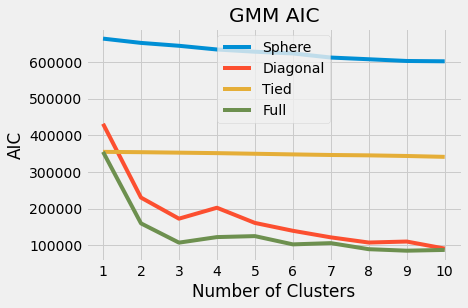

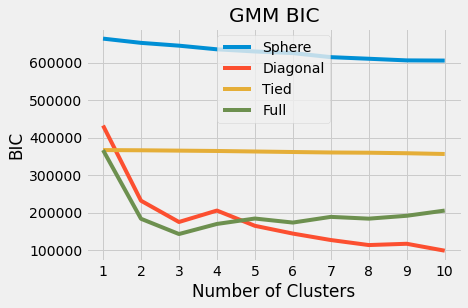

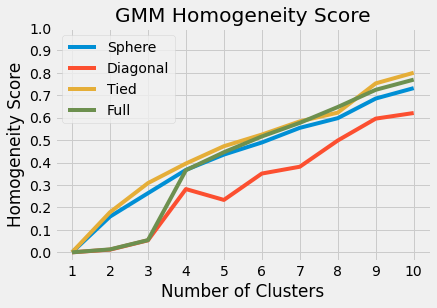

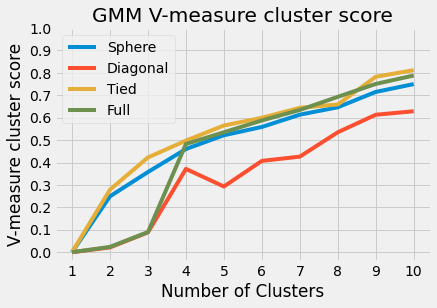

In [34]:
gaussianMixtureDataGenerator(data, "GMM")

# Dimensionality Reduction

## PCA

No handles with labels found to put in legend.


[0.14890594 0.28509365 0.40303959 0.48713938 0.54496353 0.59413263
 0.6372925  0.67390623 0.70743871 0.73822677 0.76195018 0.78467714
 0.80289578 0.82063433 0.83530534 0.84940249 0.86258838 0.87506976
 0.88524694 0.89430312 0.9031985  0.91116973 0.91884467 0.9260737
 0.93303259 0.9389934  0.94474955 0.94990113 0.95479652 0.9590854
 0.96282146 0.96635421 0.96972105 0.97300135 0.97608455 0.97902234
 0.98158823 0.98386565 0.98608843 0.98820273 0.99010182 0.99168835
 0.99319995 0.99460574 0.99577196 0.99684689 0.99781094 0.99858557
 0.99914278 0.99954711 0.99975703 0.99983951 0.99989203 0.99994255
 0.99997555 0.99998798 0.99999503 0.99999804 0.99999911 0.99999966
 1.         1.         1.         1.        ]


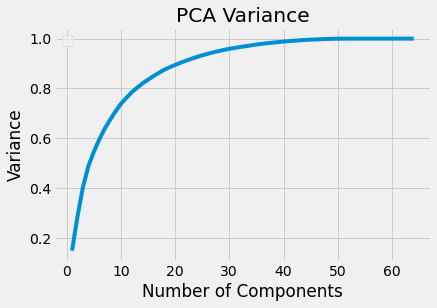

In [200]:
#what is the distribution of eigenvalues
#how well is the data reconstructed by PCA?
def runPCA(data,algType):
    variances = []
    pca = PCA().fit(data)
    print(np.cumsum(pca.explained_variance_ratio_))
    plt.style.use("fivethirtyeight")
    plt.plot(range(1, 65),np.cumsum(pca.explained_variance_ratio_))   
    plt.xlabel("Number of Components")
    plt.ylabel("Variance")
    plt.legend()
    plt.title(f'''{algType}''')
    plt.show()
    return None
    
runPCA(data,"PCA Variance")

## ICA

C:\Users\Nimesh\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
C:\Users\Nimesh\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
C:\Users\Nimesh\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
C:\Users\Nimesh\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
C:\Users\Nimesh\AppData\Roaming\Python\Python37\site-pac

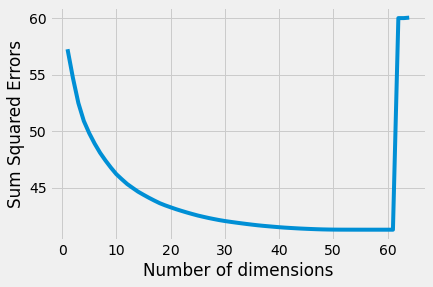

In [87]:
#how kurtotic are the distributions? Do the projection axes for ICA seem to capture anything "meaningful"?
#how well is the data reconstructed by PCA?
def runICA(data,title):
    rc_errors = {}
    for dim in range(1,65):
        ica = FastICA(n_components=dim, random_state=42)
        x_prime = ica.fit_transform(data)

        # reconstruction
        A = np.linalg.pinv(ica.components_.T)
        reconstructed = np.dot(x_prime, A)
        rc_err = mean_squared_error(data, reconstructed)    
        rc_errors[dim] = rc_err
    #     print(dim, ": ", rc_err)
    plt.figure()
    plt.plot(list(rc_errors.keys()), list(rc_errors.values()))
    plt.xlabel("Number of dimensions")
    plt.ylabel("Sum Squared Errors")
    plt.show()
    return None

runICA(data,'none')

## Random Projection (Gaussian)

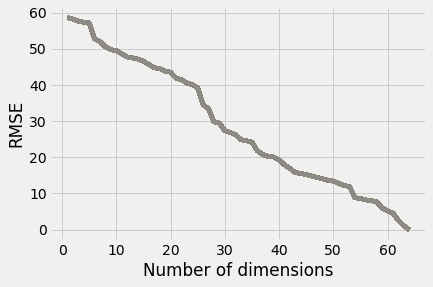

In [132]:
#how well is the data reconstructed by the randomized projections
#How much variation did you get when you re-ran your RP several times
def runRP(data,title):
    plt.figure()
    for i in range(65): 
        rc_errors = {}
        for dim in range(1,65):
            grp = GaussianRandomProjection(n_components=dim, random_state=44)
            x_prime = grp.fit_transform(data)

            # reconstruction
            A = np.linalg.pinv(grp.components_.T)
            reconstructed = np.dot(x_prime, A)
            rc_err = mean_squared_error(data, reconstructed)    
            rc_errors[dim] = rc_err
        plt.plot(list(rc_errors.keys()), list(rc_errors.values()),label = i)   

    plt.xlabel("Number of dimensions")
    plt.ylabel("RMSE")
    plt.show()
    return None
    
runRP(data,'Title')

## VarianceThreshold

No handles with labels found to put in legend.


[0.02870851 0.17760901 0.31366648 0.4313793  0.5152669  0.57305239
 0.62057977 0.66283586 0.6990314  0.73242651 0.75663714 0.7799089
 0.79985673 0.81783358 0.83381466 0.84795889 0.86147707 0.87415508
 0.88433711 0.89406235 0.90305476 0.91104602 0.91873097 0.92596287
 0.93292761 0.938909   0.94466634 0.94984872 0.9547508  0.95904027
 0.96277765 0.96632182 0.96969072 0.97297104 0.97606581 0.97900435
 0.9815722  0.98385003 0.98607354 0.98819354 0.99009287 0.99167965
 0.99319514 0.99460172 0.99576833 0.99684367 0.99780774 0.99858245
 0.99914224 0.99954682 0.99975677 0.99983925 0.999892   0.99994254
 0.99997553 0.99998797 0.99999503 0.99999804 0.99999911 0.99999966
 1.         1.         1.        ]


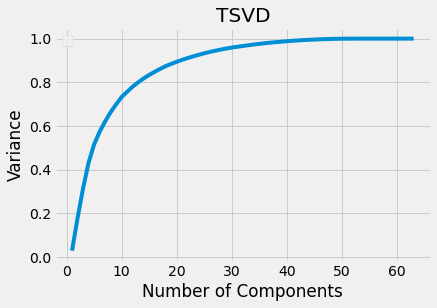

In [133]:
def runTSVD(data,algType):
    variances = []
    TSVD = TruncatedSVD(63).fit(data)
    print(np.cumsum(TSVD.explained_variance_ratio_))
    plt.style.use("fivethirtyeight")
    plt.plot(range(1, 64),np.cumsum(TSVD.explained_variance_ratio_))   
    plt.xlabel("Number of Components")
    plt.ylabel("Variance")
    plt.legend()
    plt.title(f'''{algType}''')
    plt.show()
    return None
    
runTSVD(data,"TSVD")

# Kmeans with Dimensionality Reduction

In [ ]:
#How did we choose k?
#When you reproduced your clustering experiments on the datasets projected onto the new spaces created by ICA, PCA, and RP, 
#did you get the same clusters as before? Different clusters? Why? Why not?

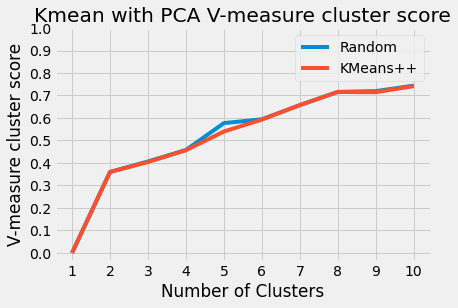

Max V-Measure is 0.7439878516637733


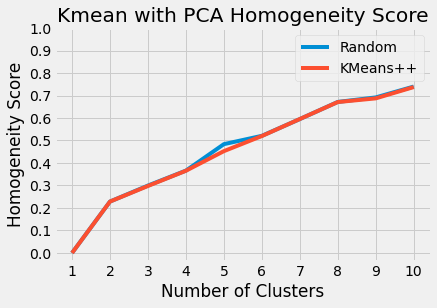

Max Homogeneity Score is 0.7397309410850935


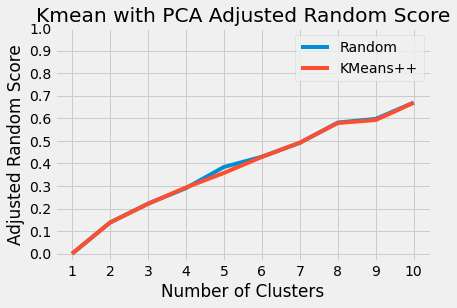

Max Adjusted Random Score is 0.6696751273486234


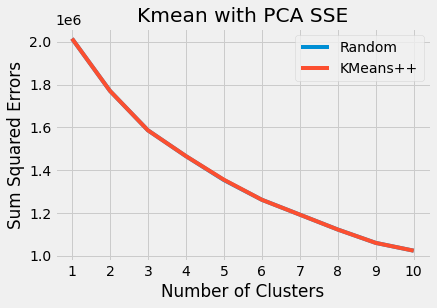

In [201]:
#PCA
pca = PCA(25).fit_transform(data)
kMeansDataGenerator(pca,'Kmean with PCA')

In [ ]:
#ICA

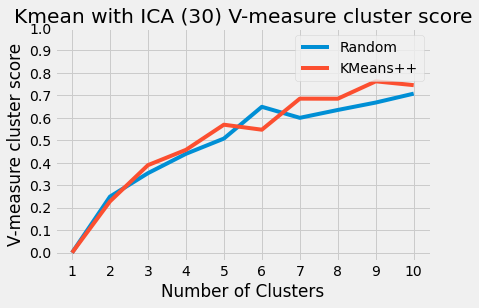

Max V-Measure is 0.7627240559727303


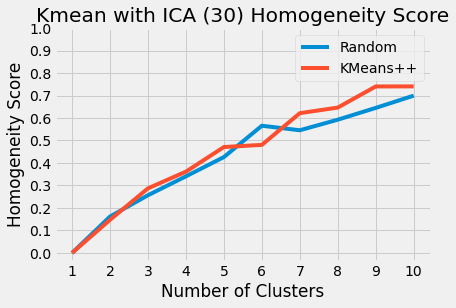

Max Homogeneity Score is 0.7405160551505907


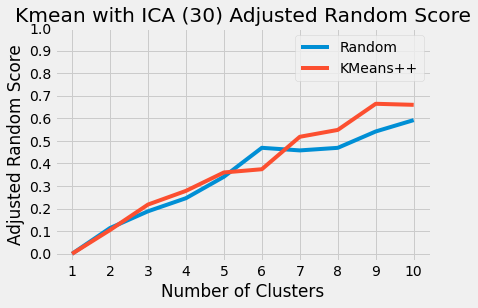

Max Adjusted Random Score is 0.6644425710516815


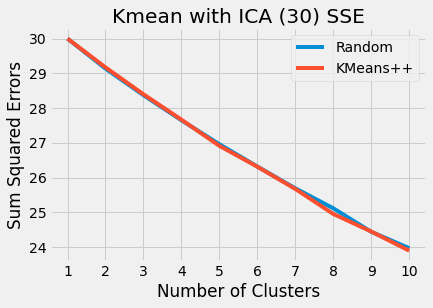

In [143]:
ica = FastICA(n_components=30, random_state=42)
x_prime = ica.fit_transform(data)
kMeansDataGenerator(x_prime,'Kmean with ICA')

In [ ]:
#Random Projection

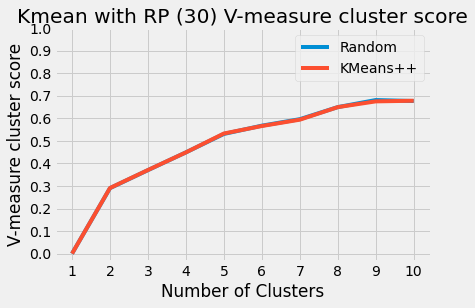

Max V-Measure is 0.6807528275166543


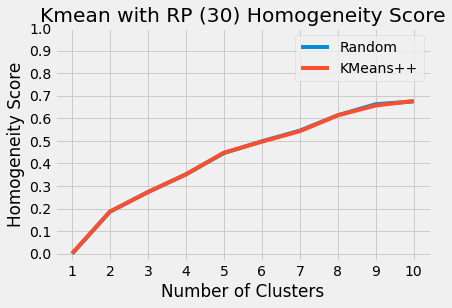

Max Homogeneity Score is 0.6765783779205349


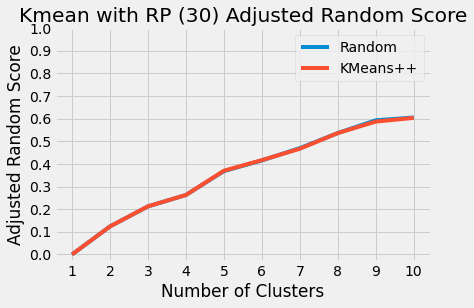

Max Adjusted Random Score is 0.6047742947416811


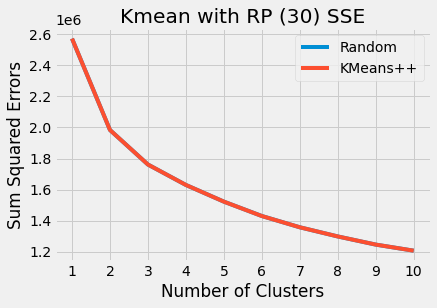

In [202]:
grp = GaussianRandomProjection(n_components=42, random_state=44)
x_prime = grp.fit_transform(data)
kMeansDataGenerator(x_prime,'Kmean with RP (30)')

In [ ]:
#TSVD

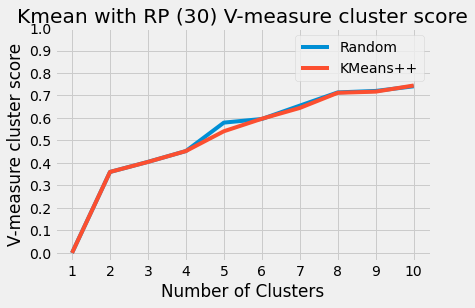

Max V-Measure is 0.7444424533871126


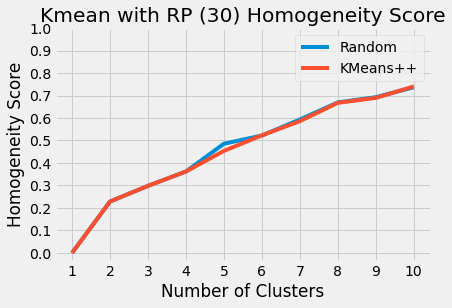

Max Homogeneity Score is 0.7402649275992327


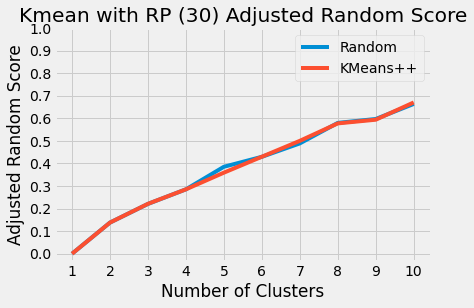

Max Adjusted Random Score is 0.6702250581281232


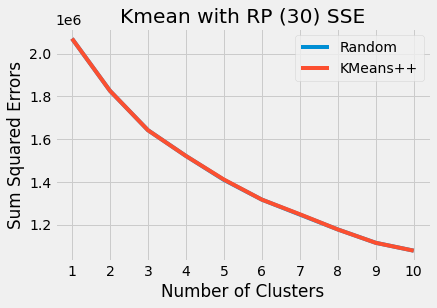

In [203]:
tsvd = TruncatedSVD(30).fit_transform(data)
kMeansDataGenerator(tsvd,'Kmean with RP')

# Expectation Maximization with Dimensionality Reduction

In [146]:
#When you reproduced your clustering experiments on the datasets projected onto the new spaces created by ICA, PCA, and RP, 
#did you get the same clusters as before? Different clusters? Why? Why not?

In [147]:
#PCA

C:\Users\Nimesh\AppData\Roaming\Python\Python37\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
C:\Users\Nimesh\AppData\Roaming\Python\Python37\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
C:\Users\Nimesh\AppData\Roaming\Python\Python37\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
C:\Users\Nimesh\AppData\Roaming\Python\Python37\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase 

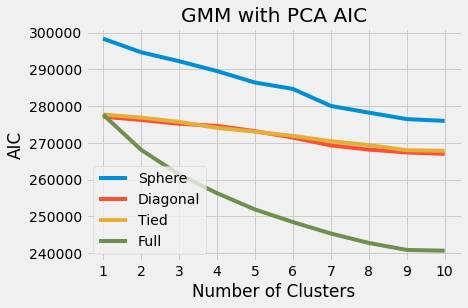

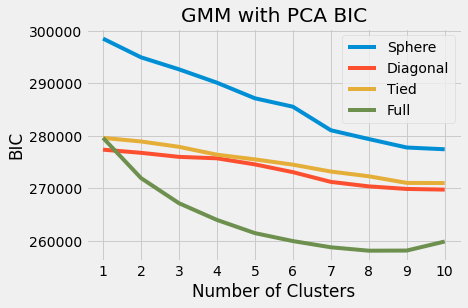

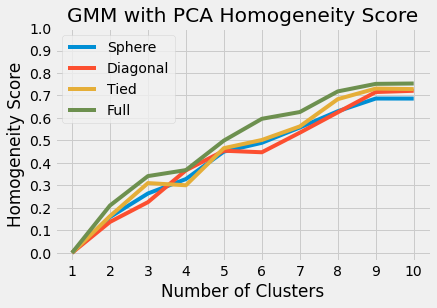

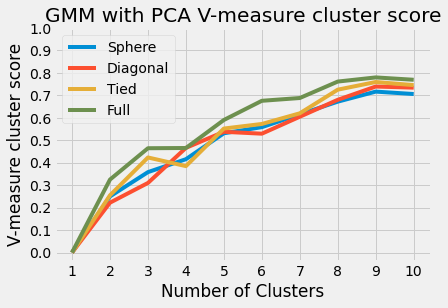

In [218]:
pca = PCA(25).fit_transform(data)
gaussianMixtureDataGenerator(pca,'GMM with PCA')

In [219]:
#ICA

C:\Users\Nimesh\AppData\Roaming\Python\Python37\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
C:\Users\Nimesh\AppData\Roaming\Python\Python37\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
C:\Users\Nimesh\AppData\Roaming\Python\Python37\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
C:\Users\Nimesh\AppData\Roaming\Python\Python37\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase 

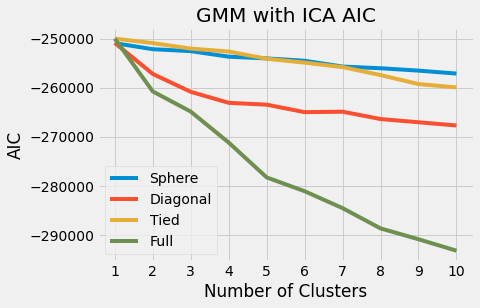

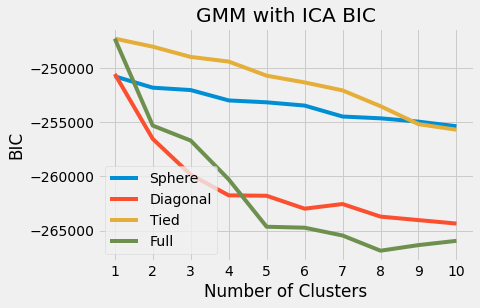

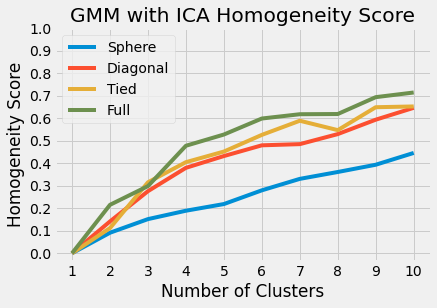

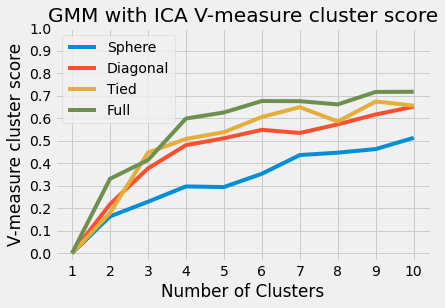

In [220]:
ica = FastICA(n_components=30, random_state=42)
x_prime = ica.fit_transform(data)
gaussianMixtureDataGenerator(x_prime,'GMM with ICA')

In [221]:
#Random Projection

C:\Users\Nimesh\AppData\Roaming\Python\Python37\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
C:\Users\Nimesh\AppData\Roaming\Python\Python37\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
C:\Users\Nimesh\AppData\Roaming\Python\Python37\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
C:\Users\Nimesh\AppData\Roaming\Python\Python37\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase 

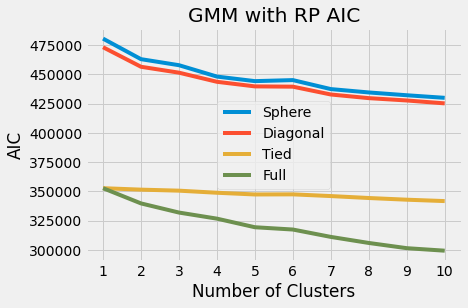

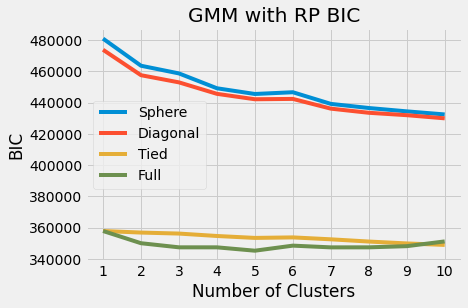

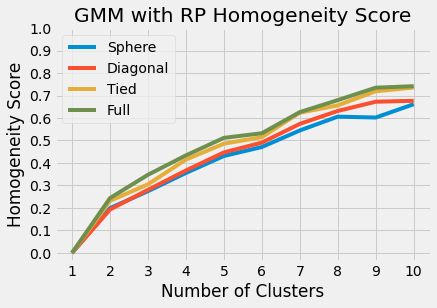

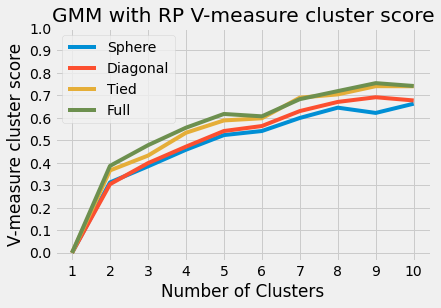

In [222]:
grp = GaussianRandomProjection(n_components=42, random_state=44)
x_prime = grp.fit_transform(data)
gaussianMixtureDataGenerator(x_prime,'GMM with RP')

In [223]:
#TSVD

C:\Users\Nimesh\AppData\Roaming\Python\Python37\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
C:\Users\Nimesh\AppData\Roaming\Python\Python37\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
C:\Users\Nimesh\AppData\Roaming\Python\Python37\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
C:\Users\Nimesh\AppData\Roaming\Python\Python37\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase 

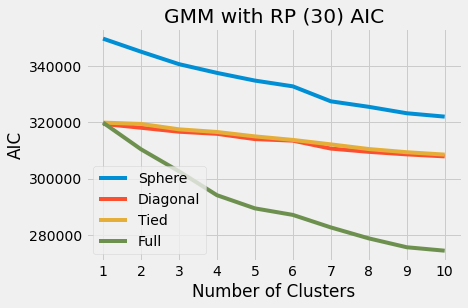

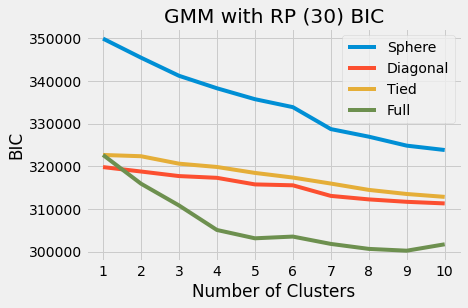

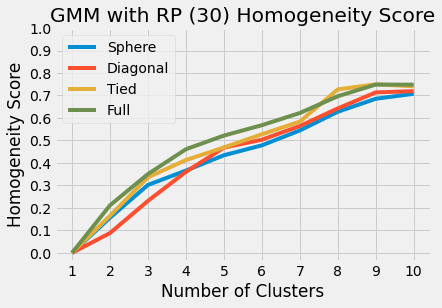

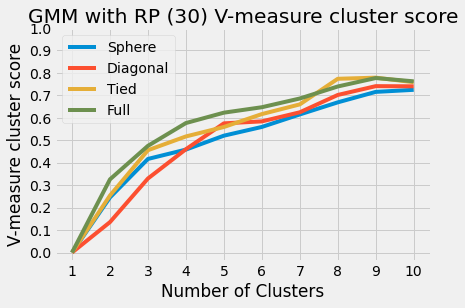

In [224]:
tsvd = TruncatedSVD(30).fit_transform(data)
gaussianMixtureDataGenerator(tsvd,'GMM with RP (30)')

# Dimensionality Reduction on Abalone Dataset w/ NN

In [ ]:
#When you re-ran your neural network algorithms were there any differences in performance? Speed? Anything at all?

In [3]:
columnNames = ["Sex", "Length", "Diameter", "Height","Whole weight","Shucked weight","Viscera weight","Shell weight","Rings"]
df = pd.read_csv('abalone.data', header=None)
df.columns = columnNames
#Clean data (Make sex a numerical category)
df['Sex'] = df['Sex'].map({'F':0,'M':1,'I':2}).astype(int)
#Clean data (Turns rings into Age)
df['Rings'] = df['Rings'].apply(lambda x: x+1.5)
df.rename(columns={'Rings': 'Age'}, inplace=True)
df["Category"] = pd.cut(df["Age"],
                               bins=[0, 5, 10, 15, 20, 25, np.inf],
                               labels=['[0-5)', '[5-10)', '[10-15)', '[15-20)', '[20-25)','[25+)'])

train, test = train_test_split(df,test_size = .2, random_state=42)

xtrain = train.drop(['Age','Category'], axis=1)
ytrain = train["Category"]

xtest = test.drop(['Age','Category'], axis=1)
ytest = test["Category"]

No handles with labels found to put in legend.


[0.77281694 0.99110064 0.99493915 0.99786025 0.9989134  0.99946573
 0.99985834 1.        ]


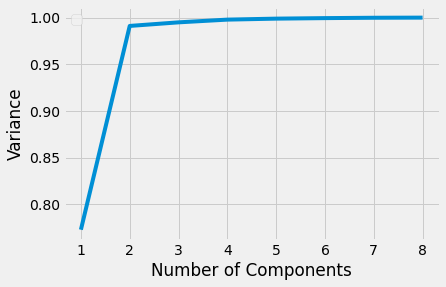

In [225]:
def runPCA(data,algType):
    variances = []
    pca = PCA().fit(data)
    print(np.cumsum(pca.explained_variance_ratio_))
    plt.style.use("fivethirtyeight")
    plt.plot(range(1, 9),np.cumsum(pca.explained_variance_ratio_))   
    plt.xlabel("Number of Components")
    plt.ylabel("Variance")
    plt.legend()
    plt.title(f'''{algType}''')
    plt.show()
    return None

runPCA(xtrain,'')

C:\Users\Nimesh\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_fastica.py:470: UserWarning: n_components is too large: it will be set to 8
  % n_components


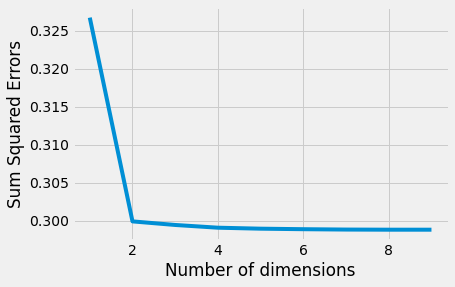

In [164]:
#how kurtotic are the distributions? Do the projection axes for ICA seem to capture anything "meaningful"?
#how well is the data reconstructed by PCA?
def runICA(data,title):
    rc_errors = {}
    for dim in range(1,10):
        ica = FastICA(n_components=dim, random_state=42)
        x_prime = ica.fit_transform(data)

        # reconstruction
        A = np.linalg.pinv(ica.components_.T)
        reconstructed = np.dot(x_prime, A)
        rc_err = mean_squared_error(data, reconstructed)    
        rc_errors[dim] = rc_err
    #     print(dim, ": ", rc_err)
    plt.figure()
    plt.plot(list(rc_errors.keys()), list(rc_errors.values()))
    plt.xlabel("Number of dimensions")
    plt.ylabel("Sum Squared Errors")
    plt.show()
    return None

runICA(xtrain,'none')

C:\Users\Nimesh\AppData\Roaming\Python\Python37\site-packages\sklearn\random_projection.py:377: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (8 < 9).The dimensionality of the problem will not be reduced.
  DataDimensionalityWarning)
C:\Users\Nimesh\AppData\Roaming\Python\Python37\site-packages\sklearn\random_projection.py:377: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (8 < 9).The dimensionality of the problem will not be reduced.
  DataDimensionalityWarning)
C:\Users\Nimesh\AppData\Roaming\Python\Python37\site-packages\sklearn\random_projection.py:377: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (8 < 9).The dimensionality of the problem will not be reduced.
  DataDimensionalityWarning)
C:\Users\Nimesh\AppData\Roaming\Python\Python37\site-packages\sklearn\random_projecti

C:\Users\Nimesh\AppData\Roaming\Python\Python37\site-packages\sklearn\random_projection.py:377: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (8 < 9).The dimensionality of the problem will not be reduced.
  DataDimensionalityWarning)
C:\Users\Nimesh\AppData\Roaming\Python\Python37\site-packages\sklearn\random_projection.py:377: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (8 < 9).The dimensionality of the problem will not be reduced.
  DataDimensionalityWarning)
C:\Users\Nimesh\AppData\Roaming\Python\Python37\site-packages\sklearn\random_projection.py:377: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (8 < 9).The dimensionality of the problem will not be reduced.
  DataDimensionalityWarning)
C:\Users\Nimesh\AppData\Roaming\Python\Python37\site-packages\sklearn\random_projecti

C:\Users\Nimesh\AppData\Roaming\Python\Python37\site-packages\sklearn\random_projection.py:377: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (8 < 9).The dimensionality of the problem will not be reduced.
  DataDimensionalityWarning)
C:\Users\Nimesh\AppData\Roaming\Python\Python37\site-packages\sklearn\random_projection.py:377: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (8 < 9).The dimensionality of the problem will not be reduced.
  DataDimensionalityWarning)
C:\Users\Nimesh\AppData\Roaming\Python\Python37\site-packages\sklearn\random_projection.py:377: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (8 < 9).The dimensionality of the problem will not be reduced.
  DataDimensionalityWarning)
C:\Users\Nimesh\AppData\Roaming\Python\Python37\site-packages\sklearn\random_projecti

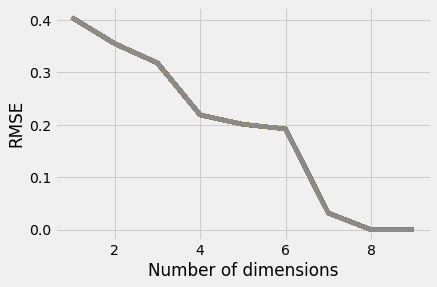

In [166]:
#how well is the data reconstructed by the randomized projections
#How much variation did you get when you re-ran your RP several times
def runRP(data,title):
    plt.figure()
    for i in range(65): 
        rc_errors = {}
        for dim in range(1,10):
            grp = GaussianRandomProjection(n_components=dim, random_state=44)
            x_prime = grp.fit_transform(data)

            # reconstruction
            A = np.linalg.pinv(grp.components_.T)
            reconstructed = np.dot(x_prime, A)
            rc_err = mean_squared_error(data, reconstructed)    
            rc_errors[dim] = rc_err
        plt.plot(list(rc_errors.keys()), list(rc_errors.values()),label = i)   

    plt.xlabel("Number of dimensions")
    plt.ylabel("RMSE")
    plt.show()
    return None
    
runRP(xtrain,'Title')

No handles with labels found to put in legend.


[0.2526634  0.97605092 0.99424095 0.99784543 0.99889956 0.99945636
 0.99985635]


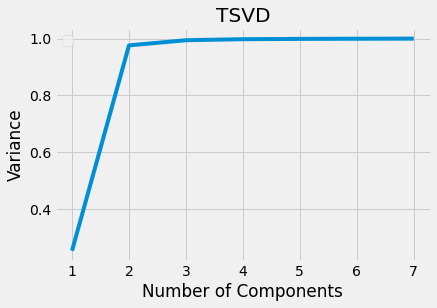

In [169]:
def runTSVD(data,algType):
    variances = []
    TSVD = TruncatedSVD(7).fit(data)
    print(np.cumsum(TSVD.explained_variance_ratio_))
    plt.style.use("fivethirtyeight")
    plt.plot(range(1, 8),np.cumsum(TSVD.explained_variance_ratio_))   
    plt.xlabel("Number of Components")
    plt.ylabel("Variance")
    plt.legend()
    plt.title(f'''{algType}''')
    plt.show()
    return None
    
runTSVD(xtrain,"TSVD")

C:\Users\Nimesh\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Nimesh\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (101) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Nimesh\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:619: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


71.56539958096378
71.17224880382776


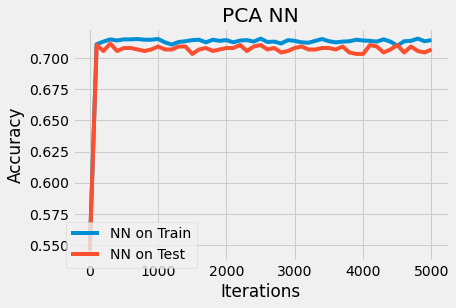

In [194]:

pca = PCA(2).fit_transform(xtrain)
pca2 = PCA(2).fit_transform(xtest)
nnTrain = []
nnTest = []
iters = np.arange(1,5100,100)
for i in iters:
    neural_net = MLPClassifier(max_iter=i,alpha=.01,hidden_layer_sizes=(150,))
    neural_net.fit(pca, ytrain)
    ypredTrain = neural_net.predict(pca)
    ypredTest = neural_net.predict(pca2)
    nnTrain.append(accuracy_score(ytrain,ypredTrain))
    nnTest.append(accuracy_score(ytest,ypredTest))
    
plt.plot(iters,nnTrain,label='NN on Train')
plt.plot(iters,nnTest,label='NN on Test')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('PCA NN')
plt.legend(loc='upper right', bbox_to_anchor=(0.35, 0.2))
print(max(nnTrain) * 100)
print(max(nnTest) * 100)

C:\Users\Nimesh\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Nimesh\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (101) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Nimesh\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (201) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


70.93684525591141
68.6602870813397


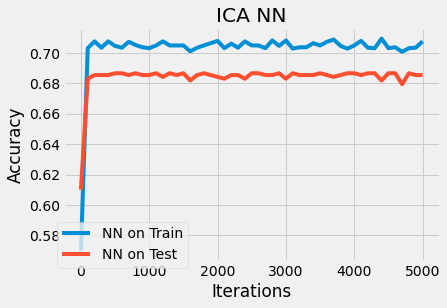

In [195]:
ica1 = FastICA(n_components=2, random_state=42).fit_transform(xtrain)
ica2 = FastICA(n_components=2, random_state=42).fit_transform(xtest)
nnTrain = []
nnTest = []
iters = np.arange(1,5100,100)
for i in iters:
    neural_net = MLPClassifier(max_iter=i,alpha=.01,hidden_layer_sizes=(150,))
    neural_net.fit(ica1, ytrain)
    ypredTrain = neural_net.predict(ica1)
    ypredTest = neural_net.predict(ica2)
    nnTrain.append(accuracy_score(ytrain,ypredTrain))
    nnTest.append(accuracy_score(ytest,ypredTest))
    
plt.plot(iters,nnTrain,label='NN on Train')
plt.plot(iters,nnTest,label='NN on Test')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('ICA NN')
plt.legend(loc='upper right', bbox_to_anchor=(0.35, 0.2))
print(max(nnTrain) * 100)
print(max(nnTest) * 100)

C:\Users\Nimesh\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Nimesh\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (101) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Nimesh\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (201) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


73.69051182280755
74.52153110047847


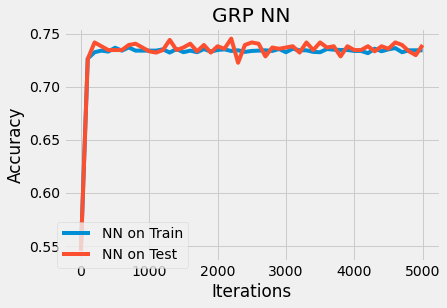

In [228]:
grp1 = GaussianRandomProjection(n_components=7, random_state=44).fit_transform(xtrain)
grp2 = GaussianRandomProjection(n_components=7, random_state=44).fit_transform(xtest)

nnTrain = []
nnTest = []
iters = np.arange(1,5100,100)
for i in iters:
    neural_net = MLPClassifier(max_iter=i,alpha=.01,hidden_layer_sizes=(150,))
    neural_net.fit(grp1, ytrain)
    ypredTrain = neural_net.predict(grp1)
    ypredTest = neural_net.predict(grp2)
    nnTrain.append(accuracy_score(ytrain,ypredTrain))
    nnTest.append(accuracy_score(ytest,ypredTest))
    
plt.plot(iters,nnTrain,label='NN on Train')
plt.plot(iters,nnTest,label='NN on Test')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('GRP NN')
plt.legend(loc='upper right', bbox_to_anchor=(0.35, 0.2))
print(max(nnTrain) * 100)
print(max(nnTest) * 100)

C:\Users\Nimesh\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Nimesh\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (101) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Nimesh\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (201) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


71.53546842262796
71.05263157894737


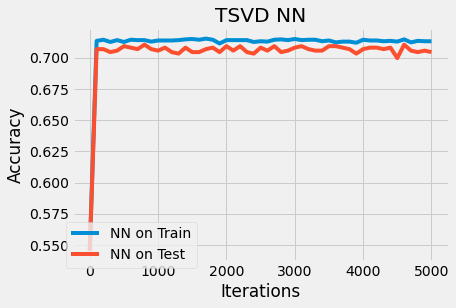

In [227]:
tsvd1 = TruncatedSVD(2).fit_transform(xtrain)
tsvd2 = TruncatedSVD(2).fit_transform(xtest)
nnTrain = []
nnTest = []
iters = np.arange(1,5100,100)
for i in iters:
    neural_net = MLPClassifier(max_iter=i,alpha=.01,hidden_layer_sizes=(150,))
    neural_net.fit(tsvd1, ytrain)
    ypredTrain = neural_net.predict(tsvd1)
    ypredTest = neural_net.predict(tsvd2)
    nnTrain.append(accuracy_score(ytrain,ypredTrain))
    nnTest.append(accuracy_score(ytest,ypredTest))
    
plt.plot(iters,nnTrain,label='NN on Train')
plt.plot(iters,nnTest,label='NN on Test')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('TSVD NN')
plt.legend(loc='upper right', bbox_to_anchor=(0.35, 0.2))
print(max(nnTrain) * 100)
print(max(nnTest) * 100)

C:\Users\Nimesh\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


74.34899730619576
72.24880382775119


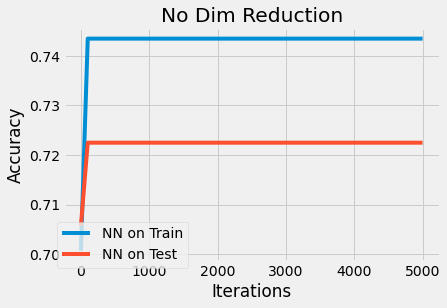

In [226]:
nnTrain = []
nnTest = []
for i in iters:
    nn = MLPClassifier(hidden_layer_sizes = (150,), learning_rate_init=0.01, random_state=42,max_iter=i)
    nn.fit(xtrain, ytrain)
    ypredTrain = nn.predict(xtrain)
    ypredTest = nn.predict(xtest)
    nnTrain.append(accuracy_score(ytrain,ypredTrain))
    nnTest.append(accuracy_score(ytest,ypredTest))

plt.plot(iters,nnTrain,label='NN on Train')
plt.plot(iters,nnTest,label='NN on Test')
plt.xlabel('Iterations')
plt.title('No Dim Reduction')
plt.ylabel('Accuracy')
plt.legend(loc='upper right', bbox_to_anchor=(0.35, 0.2))
print(max(nnTrain) * 100)
print(max(nnTest) * 100)

# Clustering with Dimensionality Reduction on Abalone Dataset w/ NN

In [ ]:
#When you re-ran your neural network algorithms were there any differences in performance? Speed? Anything at all?

# GMM + NN

C:\Users\Nimesh\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Nimesh\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (101) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


71.59533073929961
71.41148325358851


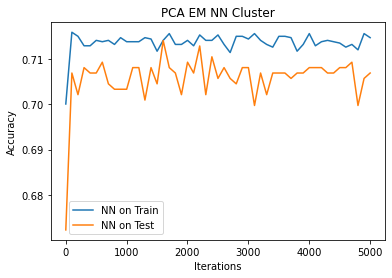

In [4]:
pca1 = PCA(2).fit_transform(xtrain)
pca2 = PCA(2).fit_transform(xtest)
cluster1= GaussianMixture(6, covariance_type='full', max_iter=20, random_state=0).fit_predict(pca1)
cluster2= GaussianMixture(6, covariance_type='full', max_iter=20, random_state=0).fit_predict(pca2)
pca1 = np.c_[pca1, cluster1]
pca2 = np.c_[pca2, cluster2]

nnTrain = []
nnTest = []
iters = np.arange(1,5100,100)
for i in iters:
    neural_net = MLPClassifier(max_iter=i,alpha=.01,hidden_layer_sizes=(150,))
    neural_net.fit(pca1, ytrain)
    ypredTrain = neural_net.predict(pca1)
    ypredTest = neural_net.predict(pca2)
    nnTrain.append(accuracy_score(ytrain,ypredTrain))
    nnTest.append(accuracy_score(ytest,ypredTest))
    
plt.plot(iters,nnTrain,label='NN on Train')
plt.plot(iters,nnTest,label='NN on Test')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('PCA EM NN Cluster')
plt.legend(loc='upper right', bbox_to_anchor=(0.35, 0.2))
print(max(nnTrain) * 100)
print(max(nnTest) * 100)

C:\Users\Nimesh\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Nimesh\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (101) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Nimesh\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (201) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


71.41574378928465
62.32057416267942


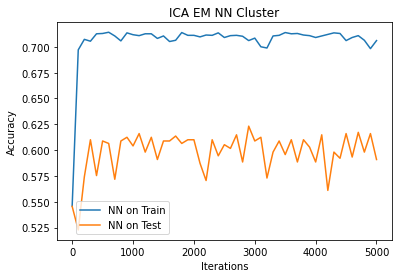

In [5]:
ica1 = FastICA(n_components=2, random_state=42).fit_transform(xtrain)
ica2 = FastICA(n_components=2, random_state=42).fit_transform(xtest)
cluster1= GaussianMixture(6, covariance_type='full', max_iter=20, random_state=0).fit_predict(ica1)
cluster2= GaussianMixture(6, covariance_type='full', max_iter=20, random_state=0).fit_predict(ica2)
ica1 = np.c_[ica1, cluster1]
ica2 = np.c_[ica2, cluster2]

nnTrain = []
nnTest = []
iters = np.arange(1,5100,100)
for i in iters:
    neural_net = MLPClassifier(max_iter=i,alpha=.01,hidden_layer_sizes=(150,))
    neural_net.fit(ica1, ytrain)
    ypredTrain = neural_net.predict(ica1)
    ypredTest = neural_net.predict(ica2)
    nnTrain.append(accuracy_score(ytrain,ypredTrain))
    nnTest.append(accuracy_score(ytest,ypredTest))
    
plt.plot(iters,nnTrain,label='NN on Train')
plt.plot(iters,nnTest,label='NN on Test')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('ICA EM NN Cluster')
plt.legend(loc='upper right', bbox_to_anchor=(0.35, 0.2))
print(max(nnTrain) * 100)
print(max(nnTest) * 100)

C:\Users\Nimesh\AppData\Roaming\Python\Python37\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
C:\Users\Nimesh\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Nimesh\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (101) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Nimesh\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (201) rea

73.92996108949417
72.96650717703349


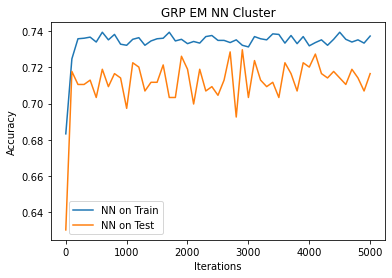

In [6]:
grp1 = GaussianRandomProjection(n_components=7, random_state=44).fit_transform(xtrain)
grp2 = GaussianRandomProjection(n_components=7, random_state=44).fit_transform(xtest)

cluster1= GaussianMixture(6, covariance_type='full', max_iter=20, random_state=0).fit_predict(grp1)
cluster2= GaussianMixture(6, covariance_type='full', max_iter=20, random_state=0).fit_predict(grp2)
grp1 = np.c_[grp1, cluster1]
grp2 = np.c_[grp2, cluster2]

nnTrain = []
nnTest = []
iters = np.arange(1,5100,100)
for i in iters:
    neural_net = MLPClassifier(max_iter=i,alpha=.01,hidden_layer_sizes=(150,))
    neural_net.fit(grp1, ytrain)
    ypredTrain = neural_net.predict(grp1)
    ypredTest = neural_net.predict(grp2)
    nnTrain.append(accuracy_score(ytrain,ypredTrain))
    nnTest.append(accuracy_score(ytest,ypredTest))
    
plt.plot(iters,nnTrain,label='NN on Train')
plt.plot(iters,nnTest,label='NN on Test')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('GRP EM NN Cluster')
plt.legend(loc='upper right', bbox_to_anchor=(0.35, 0.2))
print(max(nnTrain) * 100)
print(max(nnTest) * 100)

C:\Users\Nimesh\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Nimesh\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (101) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


71.53546842262796
70.57416267942584


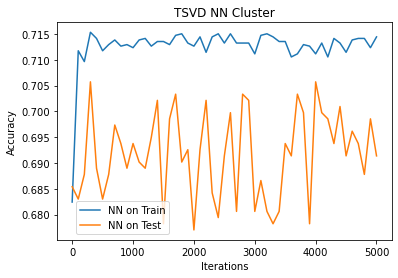

In [12]:
tsvd1 = TruncatedSVD(2).fit_transform(xtrain)
tsvd2 = TruncatedSVD(2).fit_transform(xtest)
cluster1= GaussianMixture(6, covariance_type='full', max_iter=20, random_state=0).fit_predict(tsvd1)
cluster2= GaussianMixture(6, covariance_type='full', max_iter=20, random_state=0).fit_predict(tsvd2)
tsvd1 = np.c_[tsvd1, cluster1]
tsvd2 = np.c_[tsvd2, cluster2]

nnTrain = []
nnTest = []
iters = np.arange(1,5100,100)
for i in iters:
    neural_net = MLPClassifier(max_iter=i,alpha=.01,hidden_layer_sizes=(150,))
    neural_net.fit(tsvd1, ytrain)
    ypredTrain = neural_net.predict(tsvd1)
    ypredTest = neural_net.predict(tsvd2)
    nnTrain.append(accuracy_score(ytrain,ypredTrain))
    nnTest.append(accuracy_score(ytest,ypredTest))
    
plt.plot(iters,nnTrain,label='NN on Train')
plt.plot(iters,nnTest,label='NN on Test')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('TSVD NN Cluster')
plt.legend(loc='upper right', bbox_to_anchor=(0.35, 0.2))
print(max(nnTrain) * 100)
print(max(nnTest) * 100)

C:\Users\Nimesh\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Nimesh\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (101) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Nimesh\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (201) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


71.59533073929961
71.65071770334929


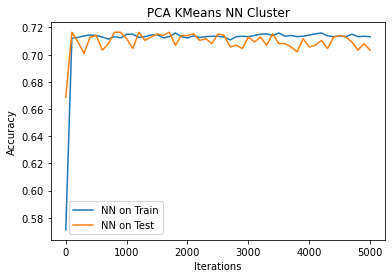

In [13]:
pca1 = PCA(2).fit_transform(xtrain)
pca2 = PCA(2).fit_transform(xtest)
cluster1= KMeans(n_clusters=6).fit_predict(pca1)
cluster2= KMeans(n_clusters=6).fit_predict(pca2)
pca1 = np.c_[pca1, cluster1]
pca2 = np.c_[pca2, cluster2]

nnTrain = []
nnTest = []
iters = np.arange(1,5100,100)
for i in iters:
    neural_net = MLPClassifier(max_iter=i,alpha=.01,hidden_layer_sizes=(150,))
    neural_net.fit(pca1, ytrain)
    ypredTrain = neural_net.predict(pca1)
    ypredTest = neural_net.predict(pca2)
    nnTrain.append(accuracy_score(ytrain,ypredTrain))
    nnTest.append(accuracy_score(ytest,ypredTest))
    
plt.plot(iters,nnTrain,label='NN on Train')
plt.plot(iters,nnTest,label='NN on Test')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('PCA KMeans NN Cluster')
plt.legend(loc='upper right', bbox_to_anchor=(0.35, 0.2))
print(max(nnTrain) * 100)
print(max(nnTest) * 100)

C:\Users\Nimesh\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Nimesh\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (101) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


71.38581263094882
68.0622009569378


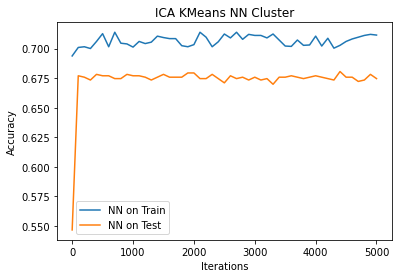

In [14]:
ica1 = FastICA(n_components=2, random_state=42).fit_transform(xtrain)
ica2 = FastICA(n_components=2, random_state=42).fit_transform(xtest)
cluster1= KMeans(n_clusters=6).fit_predict(ica1)
cluster2= KMeans(n_clusters=6).fit_predict(ica2)
ica1 = np.c_[ica1, cluster1]
ica2 = np.c_[ica2, cluster2]

nnTrain = []
nnTest = []
iters = np.arange(1,5100,100)
for i in iters:
    neural_net = MLPClassifier(max_iter=i,alpha=.01,hidden_layer_sizes=(150,))
    neural_net.fit(ica1, ytrain)
    ypredTrain = neural_net.predict(ica1)
    ypredTest = neural_net.predict(ica2)
    nnTrain.append(accuracy_score(ytrain,ypredTrain))
    nnTest.append(accuracy_score(ytest,ypredTest))
    
plt.plot(iters,nnTrain,label='NN on Train')
plt.plot(iters,nnTest,label='NN on Test')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('ICA KMeans NN Cluster')
plt.legend(loc='upper right', bbox_to_anchor=(0.35, 0.2))
print(max(nnTrain) * 100)
print(max(nnTest) * 100)

C:\Users\Nimesh\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Nimesh\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (101) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Nimesh\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (201) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


73.78030529781503
73.56459330143541


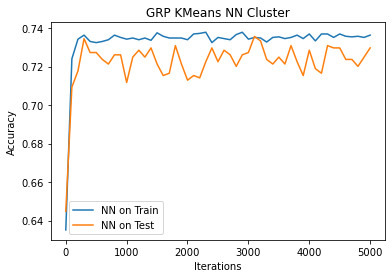

In [15]:
grp1 = GaussianRandomProjection(n_components=7, random_state=44).fit_transform(xtrain)
grp2 = GaussianRandomProjection(n_components=7, random_state=44).fit_transform(xtest)
cluster1= KMeans(n_clusters=6).fit_predict(grp1)
cluster2= KMeans(n_clusters=6).fit_predict(grp2)
grp1 = np.c_[grp1, cluster1]
grp2 = np.c_[grp2, cluster2]

nnTrain = []
nnTest = []
iters = np.arange(1,5100,100)
for i in iters:
    neural_net = MLPClassifier(max_iter=i,alpha=.01,hidden_layer_sizes=(150,))
    neural_net.fit(grp1, ytrain)
    ypredTrain = neural_net.predict(grp1)
    ypredTest = neural_net.predict(grp2)
    nnTrain.append(accuracy_score(ytrain,ypredTrain))
    nnTest.append(accuracy_score(ytest,ypredTest))
    
plt.plot(iters,nnTrain,label='NN on Train')
plt.plot(iters,nnTest,label='NN on Test')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('GRP KMeans NN Cluster')
plt.legend(loc='upper right', bbox_to_anchor=(0.35, 0.2))
print(max(nnTrain) * 100)
print(max(nnTest) * 100)

C:\Users\Nimesh\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Nimesh\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (101) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Nimesh\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (201) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


71.50553726429213
71.88995215311004


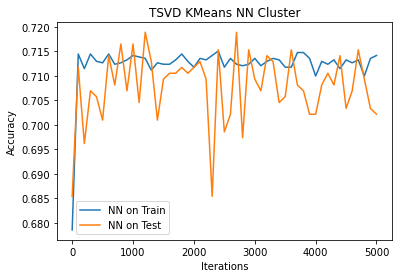

In [16]:
tsvd1 = TruncatedSVD(2).fit_transform(xtrain)
tsvd2 = TruncatedSVD(2).fit_transform(xtest)
cluster1= KMeans(n_clusters=6).fit_predict(tsvd1)
cluster2= KMeans(n_clusters=6).fit_predict(tsvd2)
tsvd1 = np.c_[tsvd1, cluster1]
tsvd2 = np.c_[tsvd2, cluster2]

nnTrain = []
nnTest = []
iters = np.arange(1,5100,100)
for i in iters:
    neural_net = MLPClassifier(max_iter=i,alpha=.01,hidden_layer_sizes=(150,))
    neural_net.fit(tsvd1, ytrain)
    ypredTrain = neural_net.predict(tsvd1)
    ypredTest = neural_net.predict(tsvd2)
    nnTrain.append(accuracy_score(ytrain,ypredTrain))
    nnTest.append(accuracy_score(ytest,ypredTest))
    
plt.plot(iters,nnTrain,label='NN on Train')
plt.plot(iters,nnTest,label='NN on Test')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('TSVD KMeans NN Cluster')
plt.legend(loc='upper right', bbox_to_anchor=(0.35, 0.2))
print(max(nnTrain) * 100)
print(max(nnTest) * 100)